## E1: Dice Coefficient

This experiment looks at the effectiveness of using the dice coefficient for ASAG.

$$
\frac{2\lvert X \cap Y \rvert}{\lvert X \rvert + \lvert Y \rvert}
$$

All these techniques are mathematical set techniques. This means multiple occurances of words are all combined into one word.

It is run on the English, German and Spanish Datasets.

In [71]:
import sys
import numpy as np
sys.path.append('../')
import libs.utils as utils
import libs.stats as stats
import libs.preprocessing as pp
import libs.word_overlap as wo
from importlib import reload
import spacy

### E1.1: English Dataset (v2_en)

E1.1 Pipeline Techniques:

1. Lowercase
2. Remove all Stopwords
3. Remove Punctuation
4. Stem all the words

In [72]:
df2_en = utils.load_dataframe(language='en', version=2)
display(df2_en.head(2))
print(len(df2_en))

nlp_en = spacy.load('en')

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   
1  1.1    1    1   What is the role of a prototype program in pr...   

                                        Model Answer  \
0   To simulate the behaviour of portions of the ...   
1   To simulate the behaviour of portions of the ...   

                                      Student Answer  Score  
0   High risk problems are address in the prototy...    3.5  
1   To simulate portions of the desired final pro...    5.0

2442


In [73]:
pipeline_phases = { 'lowercase' : pp.lowercase, 
                    'stopwords' : pp.remove_stopwords,
                    'punctuation' : pp.remove_punctuation,
                    'stemming' : pp.stem}

pipeline1 = pp.create_pipeline(pipeline_phases, tokenizer=pp.tokenize)

In [6]:
results = wo.execute_word_overlap_model(df2_en, pipeline1, wo.dice_coefficient)

Accuracy: 10.401%
Precision: 49.066%
Recall: 10.401%
F1-Measure: 12.631%
Pearson's R: 0.43
Cohen's Kappa: 0.01
RMSE: 2.70
MAE: 2.37
Y-True Mean: 4.05
Y-Pred Mean: 1.72
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.36


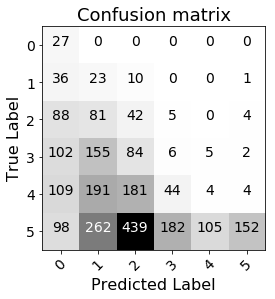

In [74]:
stats.print_big4(results['y_true'], results['y_pred'])
stats.print_stats(results['y_true'], results['y_pred'])
stats.plot_confusion_matrix(stats.cm(results['y_true'], results['y_pred']), classes=np.unique(results['y_true']))

## E1.2 : English v2.0_en using Lemmatization

1. Punctuation
2. Lemmatization
3. Stopword Removal

In [76]:
pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.EN_STOPS) }

pipeline2 = pp.create_spacy_pipeline(nlp=nlp_en, pipeline_map=pipeline_phases)

In [77]:
e2_res = wo.execute_word_overlap_model(df2_en, pipeline2, wo.dice_coefficient)

Accuracy: 12.080%
Precision: 49.714%
Recall: 12.080%
F1-Measure: 13.871%
Pearson's R: 0.40
Cohen's Kappa: 0.01
RMSE: 2.31
MAE: 2.00
Y-True Mean: 4.05
Y-Pred Mean: 2.14
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.18


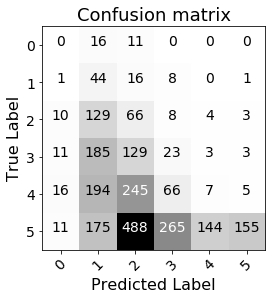

In [78]:
stats.print_big4(e2_res['y_true'], e2_res['y_pred'])
stats.print_stats(e2_res['y_true'], e2_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e2_res['y_true'], e2_res['y_pred']), classes=np.unique(e2_res['y_true']))

## E1.3 Dataset v2.0_EN with Spelling correction

1. Punctuation Removal
2. Lemmatization
3. Stopword Removal
4. Spelling Correction

In [20]:
reload(pp)

# Create the dictionary
raw_sents = df['Prompt'].unique().tolist()
spell_dict = pp.create_dictionary(nlp_en, raw_sents)
hspell = pp.create_hunspell(os='linux')
spell_autocorrect = pp.create_spell_autocorrect(hspell, spell_dict)

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.EN_STOPS),
                    'spelling_correction' : spell_autocorrect }

pipeline3 = pp.create_spacy_pipeline(nlp=nlp_en, pipeline_map=pipeline_phases)

In [23]:
e3_res = wo.execute_word_overlap_model(df, pipeline3, wo.dice_coefficient)

In [24]:
stats.print_big4(e3_res['y_true'], e3_res['y_pred'])
stats.print_stats(e3_res['y_true'], e3_res['y_pred'])

Accuracy: 12.080%
Precision: 49.465%
Recall: 12.080%
F1-Measure: 14.010%
Pearson's R: 0.40
Cohen's Kappa: 0.01
RMSE: 2.30
MAE: 1.99
Y-True Mean: 4.05
Y-Pred Mean: 2.16
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.18


### E1.4: Dataset v2.0_EN for Pass / Fail

Preprocessing
1. Lemmatization
2. Stopword Removal

In [79]:
df2_en_pf = utils.load_dataframe(language='en', version=2, pass_fail=True)
display(df2_en_pf.head(1))
print(len(df2_en_pf))

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   

                                        Model Answer  \
0   To simulate the behaviour of portions of the ...   

                                      Student Answer  Score  
0   High risk problems are address in the prototy...    1.0

2442


In [80]:
pipeline_phases = { 'spacy_punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.EN_STOPS) }

pipeline4 = pp.create_spacy_pipeline(nlp=nlp_en, pipeline_map=pipeline_phases)
e1_4_res = wo.execute_word_overlap_model(df2_en_pf, pipeline4, wo.dice_coefficient)

Accuracy: 34.848%
Precision: 90.534%
Recall: 34.848%
F1-Measure: 43.772%
Pearson's R: 0.12
Cohen's Kappa: 0.04
RMSE: 0.81
MAE: 0.65
Y-True Mean: 0.92
Y-Pred Mean: 0.28
Y-True Std Deviation: 0.27
Y-Pred Std Deviation: 0.45


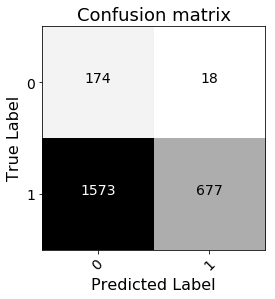

In [83]:
y_pred_pf_e1_4 = utils.convert_to_pass_fail(e1_4_res['y_pred'])

stats.print_big4(e1_4_res['y_true'], y_pred_pf_e1_4)
stats.print_stats(e1_4_res['y_true'], y_pred_pf_e1_4)
stats.plot_confusion_matrix(stats.cm(e1_4_res['y_true'], y_pred_pf_e1_4), classes=np.unique(e1_4_res['y_true']))

## E2.1 v2.0_DE German Language Version

1. Punctuation Cleaning
2. Lemmatization
3. Stopword Removal

In [42]:
df2_de = utils.load_dataframe(language='de', version=2)
display(df2_de.head(1))
print(len(df2_de))

nlp_de = spacy.load('de')

pipeline_phases = { 'spacy_punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.DE_STOPS) }

pipeline2_1 = pp.create_spacy_pipeline(nlp=nlp_de, pipeline_map=pipeline_phases)

AID  QID                                             Prompt  \
0    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                        Model Answer  Score  \
0  Um das Verhalten von Teilen des gewünschten So...    3.5   

                                      Student Answer  
0  In dem Prototyp-Programm werden Probleme mit h...

2442


In [43]:
e2_1_res = wo.execute_word_overlap_model(df2_de, pipeline2_1, wo.dice_coefficient)

Accuracy: 6.634%
Precision: 51.006%
Recall: 6.634%
F1-Measure: 8.623%
Pearson's R: 0.33
Cohen's Kappa: 0.00
RMSE: 3.29
MAE: 2.98
Y-True Mean: 4.05
Y-Pred Mean: 1.09
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.27


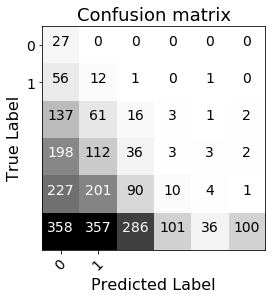

In [84]:
stats.print_big4(e2_1_res['y_true'], e2_1_res['y_pred'])
stats.print_stats(e2_1_res['y_true'], e2_1_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e2_1_res['y_true'], e2_1_res['y_pred']), classes=np.unique(e1_4_res['y_true']))

### E2.2 v2.0_DE Pass/Fail German Language

1. Punctuation Cleaning
2. Lemmatization
3. Stopword Removal

In [85]:
df2_de_pf = utils.load_dataframe(language='de', version=2, pass_fail=True)
display(df2_de_pf.head(1))
print(len(df2_de_pf))

pipeline_phases = { 'spacy_punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.DE_STOPS) }

pipeline2_2 = pp.create_spacy_pipeline(nlp=nlp_de, pipeline_map=pipeline_phases)

AID  QID                                             Prompt  \
0    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                        Model Answer  Score  \
0  Um das Verhalten von Teilen des gewünschten So...    1.0   

                                      Student Answer  
0  In dem Prototyp-Programm werden Probleme mit h...

2442


In [86]:
e2_2_res = wo.execute_word_overlap_model(df2_de_pf, pipeline2_2, wo.dice_coefficient)

Accuracy: 18.305%
Precision: 90.739%
Recall: 18.305%
F1-Measure: 20.344%
Pearson's R: 0.07
Cohen's Kappa: 0.01
RMSE: 0.90
MAE: 0.82
Y-True Mean: 0.92
Y-Pred Mean: 0.11
Y-True Std Deviation: 0.27
Y-Pred Std Deviation: 0.31


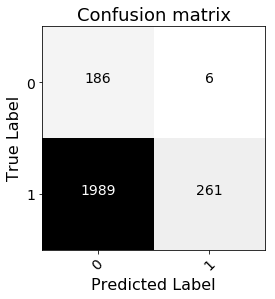

In [89]:
y_pred_pf_e2_2 = utils.convert_to_pass_fail(e2_2_res['y_pred'])

stats.print_big4(e2_2_res['y_true'], y_pred_pf_e2_2)
stats.print_stats(e2_2_res['y_true'], y_pred_pf_e2_2)
stats.plot_confusion_matrix(stats.cm(e2_2_res['y_true'], y_pred_pf_e2_2), classes=np.unique(e2_2_res['y_true']))

### E3.1 v2.0_es Spanish Language

1. Punctuation Cleaning
2. Lemmatization
3. Stopword Removal


In [49]:
df2_es = utils.load_dataframe(language='es', version=2)
display(df2_es.head(1))
print(len(df2_es))

nlp_es = spacy.load('es')

pipeline_phases = { 'spacy_punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.ES_STOPS) }

pipeline3_1 = pp.create_spacy_pipeline(nlp=nlp_es, pipeline_map=pipeline_phases)

AID  QID                                             Prompt  \
0    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                        Model Answer  Score  \
0  Para simular el comportamiento de porciones de...    3.5   

                                      Student Answer  
0  Los problemas de alto riesgo se abordan en el ...

2442


In [50]:
e3_1_res = wo.execute_word_overlap_model(df2_es, pipeline3_1, wo.dice_coefficient)

In [51]:
stats.print_big4(e3_1_res['y_true'], e3_1_res['y_pred'])
stats.print_stats(e3_1_res['y_true'], e3_1_res['y_pred'])

Accuracy: 6.716%
Precision: 46.790%
Recall: 6.716%
F1-Measure: 7.641%
Pearson's R: 0.39
Cohen's Kappa: -0.01
RMSE: 2.98
MAE: 2.68
Y-True Mean: 4.05
Y-Pred Mean: 1.40
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.25


Accuracy: 16.749%
Precision: 32.821%
Recall: 16.749%
F1-Measure: 20.314%
Pearson's R: 0.00
Cohen's Kappa: -0.00
RMSE: 2.60
MAE: 2.10
Y-True Mean: 4.05
Y-Pred Mean: 2.51
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.72


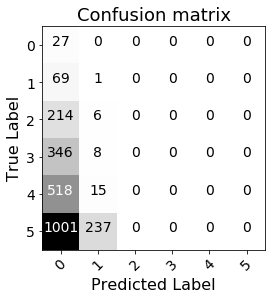

In [92]:
# RANDOMNESS
e3_1_res_res = stats.create_random_sample(e3_1_res['y_true'])
stats.print_big4(e3_1_res['y_true'], e3_1_res_res)
stats.print_stats(e3_1_res['y_true'], e3_1_res_res)
stats.plot_confusion_matrix(stats.cm(e3_1_res['y_true'], y_pred_pf_e2_2), classes=np.unique(e3_1_res['y_true']))

## E3.2 v2.0_es Spanish Language Pass / Fail

1. Punctuation Cleaning
2. Lemmatization
3. Stopword Removal

In [93]:
df2_es_pf = utils.load_dataframe(language='es', version=2, pass_fail=True)
display(df2_es_pf.head(1))
print(len(df2_es_pf))


pipeline_phases = { 'spacy_punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.ES_STOPS) }

pipeline3_2 = pp.create_spacy_pipeline(nlp=nlp_es, pipeline_map=pipeline_phases)

AID  QID                                             Prompt  \
0    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                        Model Answer  Score  \
0  Para simular el comportamiento de porciones de...    1.0   

                                      Student Answer  
0  Los problemas de alto riesgo se abordan en el ...

2442


In [94]:
e3_2_res = wo.execute_word_overlap_model(df2_es_pf, pipeline3_2, wo.dice_coefficient)

Accuracy: 22.482%
Precision: 91.345%
Recall: 22.482%
F1-Measure: 26.832%
Pearson's R: 0.10
Cohen's Kappa: 0.02
RMSE: 0.88
MAE: 0.78
Y-True Mean: 0.92
Y-Pred Mean: 0.15
Y-True Std Deviation: 0.27
Y-Pred Std Deviation: 0.36


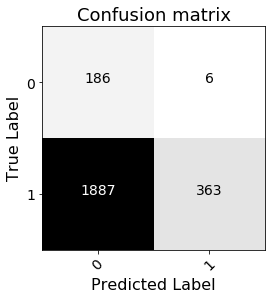

In [96]:
y_pred_pf_e3_2 = utils.convert_to_pass_fail(e3_2_res['y_pred'])

stats.print_big4(e3_2_res['y_true'], y_pred_pf_e3_2)
stats.print_stats(e3_2_res['y_true'], y_pred_pf_e3_2)

stats.plot_confusion_matrix(stats.cm(e3_2_res['y_true'], y_pred_pf_e3_2), classes=np.unique(e3_2_res['y_true']))

In [64]:
# How does this compare to randomness?
stats.print_stats(e3_2_res['y_true'], stats.create_random_sequence(values=[0,1], size=2442))

Pearson's R: -0.02
Cohen's Kappa: -0.01
RMSE: 0.71
MAE: 0.50
Y-True Mean: 0.92
Y-Pred Mean: 0.50
Y-True Std Deviation: 0.27
Y-Pred Std Deviation: 0.50
